In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('bestsellers with categories.csv')


In [8]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [11]:
df.shape 

(550, 7)

In [4]:
df.columns = ['name', 'author', 'user_rating',
              'reviews', 'price', 'year', 'genre']


In [15]:
missing = df.isna().sum()

print(missing)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [17]:
df.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

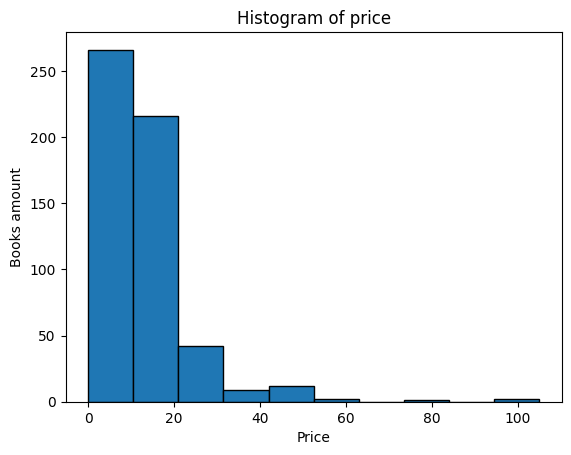

In [21]:
df['price'].plot(kind='hist', bins=10, edgecolor='black')

plt.title('Histogram of price')
plt.xlabel('Price')
plt.ylabel('Books amount')

plt.show()


In [23]:
min = df['price'].min()
max = df['price'].max()
mean = df['price'].mean()
median = df['price'].median()

print({'min':min, 'max':max, 'mean':mean, 'median':median})

{'min': 0, 'max': 105, 'mean': 13.1, 'median': 11.0}


In [25]:
max_rate = df['user_rating'].max()

print(max_rate)

4.9


In [30]:
number = df.loc[df['user_rating'] == max_rate]

print(len(number))


52


In [34]:
max_reviews = df['reviews'].max()
raws = df.loc[df['reviews'] == max_reviews]
print(raws['name'])

534    Where the Crawdads Sing
Name: name, dtype: object


In [42]:
top_50 = df.loc[df['year']>=2015]
raw = df.loc[df['price'] == top_50['price'].max()]
print(raw['name'])

151    Hamilton: The Revolution
Name: name, dtype: object


In [45]:
books_raws = df[(df['year'] == 2010)&(df['genre'] == 'Fiction')]

print(len(books_raws))

20


In [46]:
raws = df[(df['user_rating'] == 4.9) & (df['year'] == 2010) | (df['year'] == 2010)]

print(len(raws))

50


In [53]:
filtered_df = df[(df['year'] == 2015)&(df['price']<8)]

sorted_df = filtered_df.sort_values(by = 'price')
print(sorted_df['name'].tail(1))

253    Old School (Diary of a Wimpy Kid #10)
Name: name, dtype: object


In [55]:
max = df.groupby(by='genre').agg({'price': ['min', 'max']})

print(max)

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


In [83]:
books_and_authors = df.groupby(by = 'author').agg({'name': 'count'})
books_and_authors.rename(columns={'name': 'amount'}, inplace=True)
print(books_and_authors)


                            amount
author                            
Abraham Verghese                 2
Adam Gasiewski                   1
Adam Mansbach                    1
Adir Levy                        1
Admiral William H. McRaven       1
...                            ...
Walter Isaacson                  3
William Davis                    2
William P. Young                 2
Wizards RPG Team                 3
Zhi Gang Sha                     2

[248 rows x 1 columns]


In [84]:
books_and_authors.shape

(248, 1)

In [85]:
max_books = books_and_authors['amount'].idxmax()

print(raw)


Jeff Kinney


In [87]:
books_amount = books_and_authors.max()['amount']

print(books_amount)


12


In [96]:
authors_rating = df.groupby(by='author').agg({'user_rating': 'mean'})
authors_rating.rename(columns={'user_rating': 'average_rating'}, inplace=True)

print(authors_rating)


                            average_rating
author                                    
Abraham Verghese                  4.600000
Adam Gasiewski                    4.400000
Adam Mansbach                     4.800000
Adir Levy                         4.800000
Admiral William H. McRaven        4.700000
...                                    ...
Walter Isaacson                   4.566667
William Davis                     4.400000
William P. Young                  4.600000
Wizards RPG Team                  4.800000
Zhi Gang Sha                      4.600000

[248 rows x 1 columns]


In [98]:
author_min_rating = authors_rating['average_rating'].idxmin()

print(author_min_rating)

Donna Tartt


In [100]:
min_rating = authors_rating['average_rating'].min()

print(min_rating)


3.9


In [101]:
authors_info = pd.concat([books_and_authors, authors_rating], axis=1)

print(authors_info)

                            amount  average_rating
author                                            
Abraham Verghese                 2        4.600000
Adam Gasiewski                   1        4.400000
Adam Mansbach                    1        4.800000
Adir Levy                        1        4.800000
Admiral William H. McRaven       1        4.700000
...                            ...             ...
Walter Isaacson                  3        4.566667
William Davis                    2        4.400000
William P. Young                 2        4.600000
Wizards RPG Team                 3        4.800000
Zhi Gang Sha                     2        4.600000

[248 rows x 2 columns]


In [107]:
sorted_info = authors_info.sort_values(by='average_rating').index[0]

print(sorted_info)

Donna Tartt


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


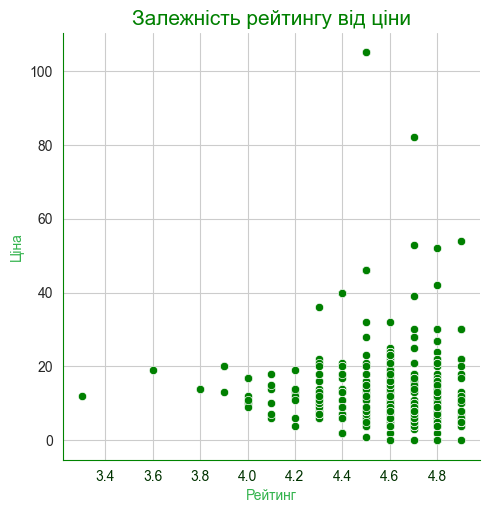

In [45]:
sns.set_style("whitegrid",  {'axes.labelcolor': "(0.2,0.7,0.3)", 'axes.edgecolor': '#008300',
                             'xtick.color': '#003300'})
sns.relplot(x='user_rating', y='price',
            kind='scatter', data=df,  color='#008000')
plt.title('Залежність рейтингу від ціни',
          fontsize=15, color="#008000")
plt.xlabel('Рейтинг', fontsize='medium')
plt.ylabel('Ціна', fontsize='medium')
plt.show()


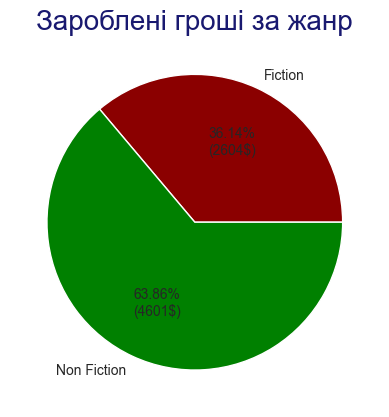

In [57]:
# 2

new_data = df.groupby(by = 'genre').agg({'price':'sum'})

total_price = new_data['price'].sum()

plt.pie(new_data['price'], labels=new_data.index,
        autopct=lambda p: '{:.2f}%\n({:.0f}$)'.format(p, p * total_price / 100), colors=['#8B0000', '#008000'])

plt.title('Зароблені гроші за жанр', fontsize=20, color="#191970")

plt.show()

                            price
author                           
Abraham Verghese               22
Adam Gasiewski                  6
Adam Mansbach                   9
Adir Levy                      13
Admiral William H. McRaven     11
...                           ...
Walter Isaacson                61
William Davis                  12
William P. Young               16
Wizards RPG Team               81
Zhi Gang Sha                   23

[248 rows x 1 columns]


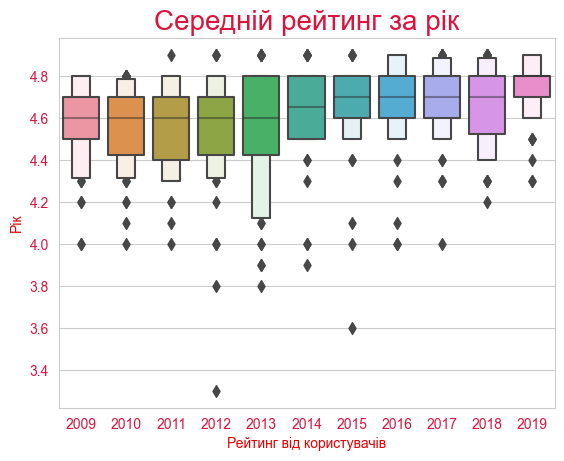

In [108]:
# 3
sns.set_style("whitegrid",  {'axes.labelcolor': "(0.9,0,0)",
                             'xtick.color': '#DC143C', 'ytick.color': '#DC143C'})

sns.boxenplot(x="year", y="user_rating", data=df)

plt.title('Середній рейтинг за рік', fontsize=20, color="#DC143C")
plt.xlabel('Рейтинг від користувачів')
plt.ylabel('Рік')

print(new_data)

                                author  price
0                           Alan Moore     42
1     American Psychiatric Association    210
2   American Psychological Association    460
3                        Bill O'Reilly     74
4                         Bill Simmons     53
5                      Brandon Stanton     47
6                     Charlaine Harris     41
7                        Dale Carnegie     55
8                            Dan Brown     46
9                      Daniel Kahneman     38
10                          Dav Pilkey     44
11                     Don Miguel Ruiz     36
12                         Donna Tartt     40
13                          Doug Lemov     40
14                           Dr. Seuss     78
15              Dr. Steven R Gundry MD     35
16                           E L James     92
17               Emily Winfield Martin     40
18                          Eric Carle     35
19                        Francis Chan     42
20                              Ga

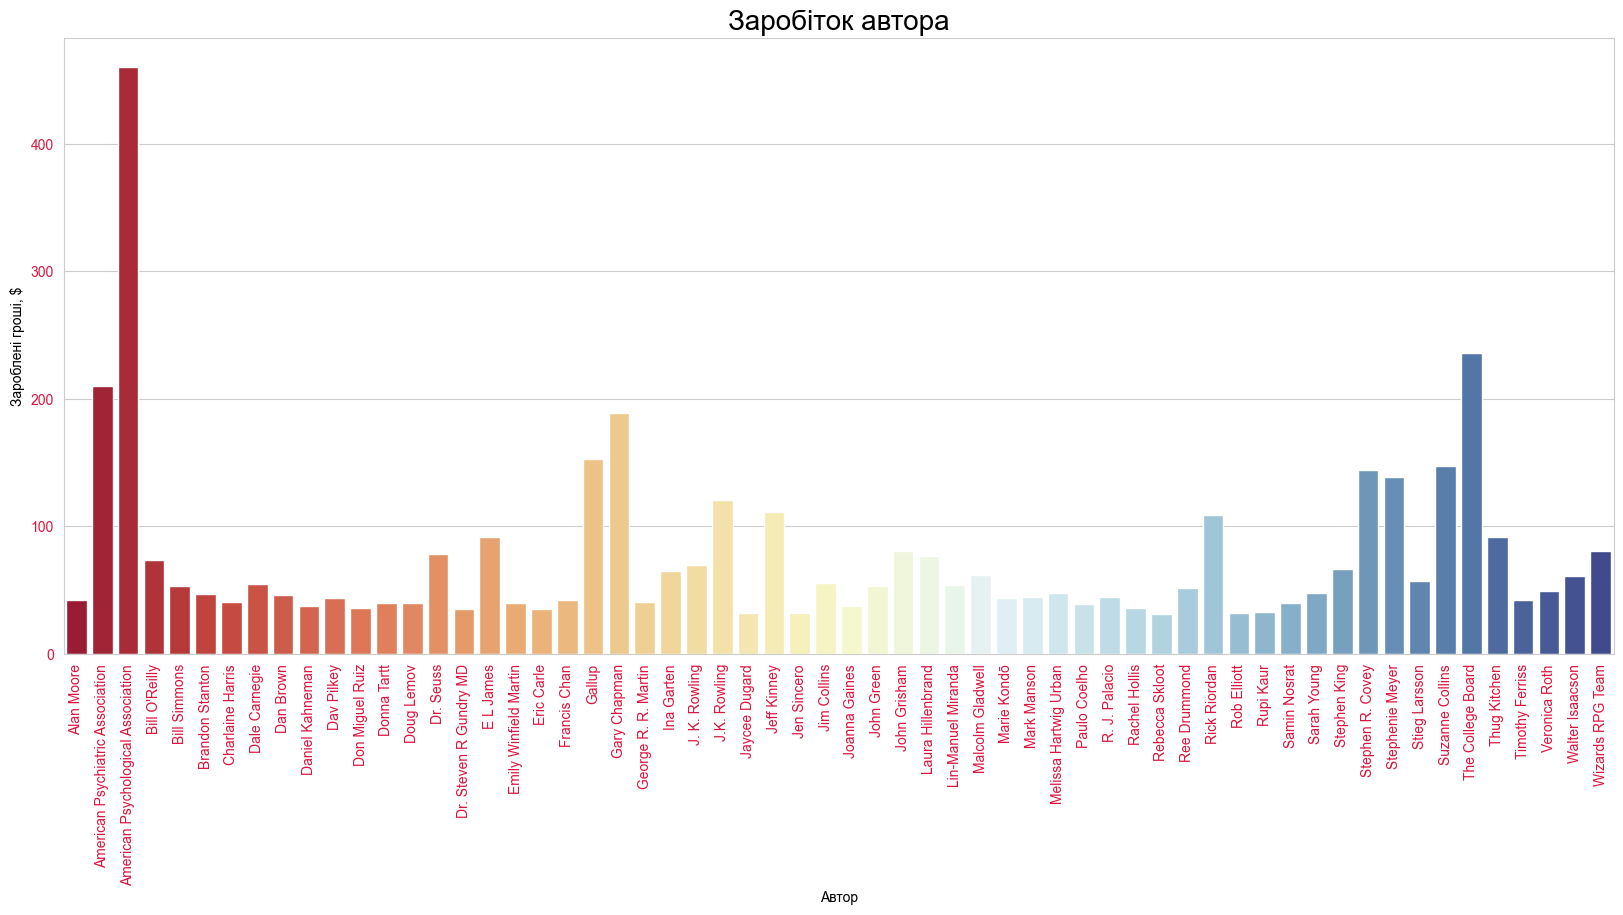

In [111]:
new_data = df.groupby(by='author').agg({'price': 'sum'})

filtred = new_data[new_data['price'] > 30].reset_index()
print(filtred)

plt.figure(figsize=(20, 8))
sns.barplot(x='author', y='price', data=filtred, palette='RdYlBu')
plt.title('Заробіток автора', fontsize=20,  color = '#000000')
plt.xlabel('Автор', color='#000000')
plt.ylabel('Зароблені гроші, $', color='#000000')
plt.xticks(rotation=90)
plt.show()
